In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
#load state murders data
state = pd.read_csv("data/state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [13]:
## Mean and Median
print("Mean = ",np.mean(state["Population"]))
print("Trimmed Mean = ",stats.trim_mean(state["Population"], 0.1))
print("Median = ",np.median(state["Population"]))

Mean =  6162876.3
Trimmed Mean =  4783697.125
Median =  4436369.5


In [17]:
## Mean vs weighted.mean
print("Mean = ",np.mean(state["Murder.Rate"]))
print("Weighted Mean = ",np.average(state["Murder.Rate"], weights=state["Population"]))


Mean =  4.066
Weighted Mean =  4.445833981123393


In [19]:
## SD, IQR and MAD
print("standard deviation = ",np.std(state["Population"]))
print("Interquantile Range = ",stats.iqr(state["Population"]))
print("MAD = ",stats.median_absolute_deviation(state["Population"]))

standard deviation =  6779407.114632265
Interquantile Range =  4847308.0
MAD =  3849870.3852


In [27]:
## Percentiles
pd.DataFrame([.05, .25, .5, .75, .95], np.quantile(state["Murder.Rate"], q=[.05, .25, .5, .75, .95]))

,0
1.600,0.05
2.425,0.25
4.000,0.50
5.550,0.75
6.510,0.95


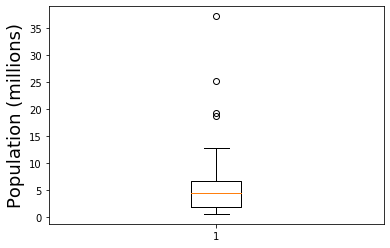

In [33]:
## boxplot
plt.boxplot(state["Population"]/1000000)
plt.ylabel("Population (millions)", fontsize = 18)
plt.show()

In [41]:
## Frecuecy table
breaks = np.linspace(start = min(state["Population"]), stop= max(state["Population"]), num=11 )
pop_freq = pd.cut(state["Population"], bins=breaks, right=True, include_lowest = True)
state['PopFreq'] = pop_freq
pop_freq.value_counts()


(563625.999, 4232659.0]     24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(33584923.0, 37253956.0]     1
(22577824.0, 26246857.0]     1
(18908791.0, 22577824.0]     1
(15239758.0, 18908791.0]     1
(29915890.0, 33584923.0]     0
(26246857.0, 29915890.0]     0
Name: Population, dtype: int64

In [75]:
## Code for FreqTable
state_abb =state.sort_values("Population").groupby("PopFreq").apply(lambda x: "%s" % ', '.join(x.Abbreviation))

state_abb = state_abb.values
pop_table = pd.DataFrame(pop_freq.value_counts())
pop_table = pop_table.reset_index().rename(columns={"index":"BinRange"})
pop_table["States"] = state_abb

pop_table


,BinRange,Population,States
0,"(563625.999, 4232659.0]",24,"WY, VT, ND, AK, SD, DE, MT, RI, NH, ME, HI, ID..."
1,"(4232659.0, 7901692.0]",14,"KY, LA, SC, AL, CO, MN, WI, MD, MO, TN, AZ, IN..."
2,"(7901692.0, 11570725.0]",6,"VA, NJ, NC, GA, MI, OH"
3,"(11570725.0, 15239758.0]",2,"PA, IL"
4,"(33584923.0, 37253956.0]",1,FL
5,"(22577824.0, 26246857.0]",1,NY
6,"(18908791.0, 22577824.0]",1,TX
7,"(15239758.0, 18908791.0]",1,
8,"(29915890.0, 33584923.0]",0,
9,"(26246857.0, 29915890.0]",0,CA


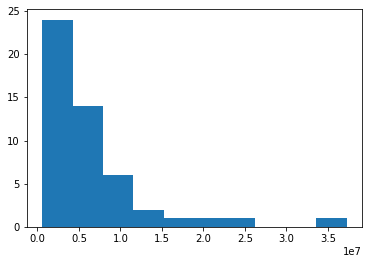

In [77]:
## Histogram
plt.hist(state["Population"], bins=breaks)
plt.show()

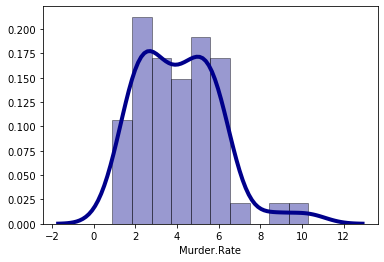

In [85]:
## Density plot
import seaborn as sns

sns.distplot(state["Murder.Rate"], hist=True, kde=True, bins=10, 
             color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

In [120]:
## Load dfw_airline.csv
dfw = pd.read_csv('data/dfw_airline.csv')
sm=dfw.sum(axis=1)
dfw.div(sm.values[0])*100



,Carrier,ATC,Weather,Security,Inbound
0,23.022989,30.400781,4.025214,0.122937,42.428079


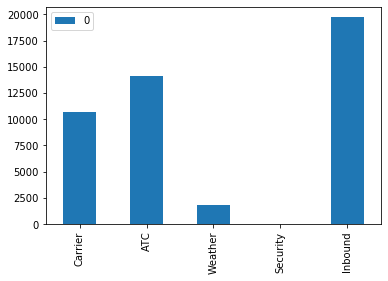

In [123]:
## barplot
dfw.div(6).T.plot.bar()

In [144]:
## Code for CorrTable
sp500_px = pd.read_csv('data/sp500_data.csv')
sp500_sym = pd.read_csv('data/sp500_sectors.csv')
telecom = sp500_px[list(sp500_sym[sp500_sym.sector=="telecommunications_services"]["symbol"].values)]
print(len(telecom))
telecom_cor =  telecom.corr()
telecom_cor

5647


,T,CTL,FTR,VZ,LVLT
T,1.000000,0.405853,0.283279,0.617035,0.061545
CTL,0.405853,1.000000,0.377644,0.385752,0.054534
FTR,0.283279,0.377644,1.000000,0.289295,0.067313
VZ,0.617035,0.385752,0.289295,1.000000,0.045919
LVLT,0.061545,0.054534,0.067313,0.045919,1.000000


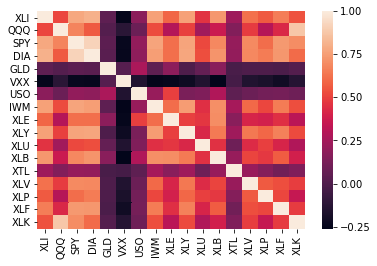

In [149]:
etfs = sp500_px[list(sp500_sym[sp500_sym.sector=="etf"]["symbol"].values)]
sns.heatmap(etfs.corr())
#corrplot(cor(etfs), method = "ellipse")

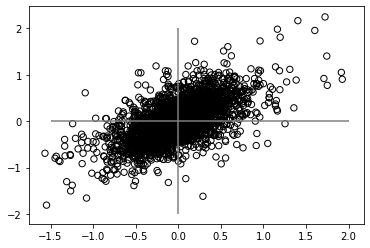

In [174]:
## Code ScatterPlot
plt.scatter(telecom["T"], telecom["VZ"], s=40, facecolors='none', edgecolors='black')
plt.hlines(0,xmin=-1.5, xmax=2, colors='gray') # x = 0
plt.vlines(0, ymin=-2, ymax=2, colors='gray')
plt.show()


432693


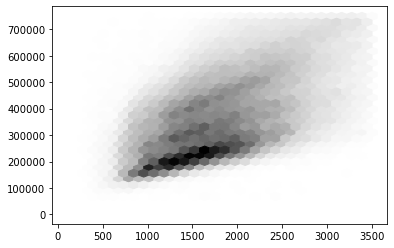

In [198]:
## Code Hexagonal bins
kc_tax = pd.read_csv('data/kc_tax.csv')
kc_tax0 = kc_tax[ (kc_tax.TaxAssessedValue < 750000) & (kc_tax.SqFtTotLiving>100) & (kc_tax.SqFtTotLiving<3500)]
print(len(kc_tax0))
plt.hexbin(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, gridsize=30, cmap=plt.cm.binary)
plt.show()

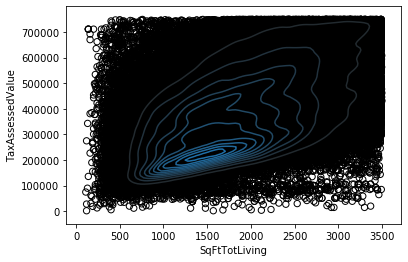

In [205]:
## Code contour
plt.scatter(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue, s=40, facecolors='none', edgecolors='black')
sns.kdeplot(kc_tax0.SqFtTotLiving, kc_tax0.TaxAssessedValue)

plt.show()

In [208]:
## Contingency table
lc_loans = pd.read_csv('data/lc_loans.csv')

x_tab = pd.crosstab(lc_loans.grade, lc_loans.status)
x_tab

status,Charged Off,Current,Fully Paid,Late
grade,,,,
A,1562,50051,20408,469
B,5302,93852,31160,2056
C,6023,88928,23147,2777
D,5007,53281,13681,2308
E,2842,24639,5949,1374
F,1526,8444,2328,606
G,409,1990,643,199


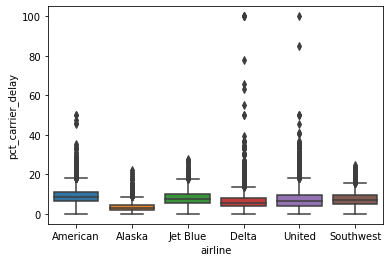

In [214]:
# Multiple boxplots
airline_stats = pd.read_csv('data/airline_stats.csv')

sns.boxplot( y=airline_stats["pct_carrier_delay"], x=airline_stats["airline"])
plt.show()

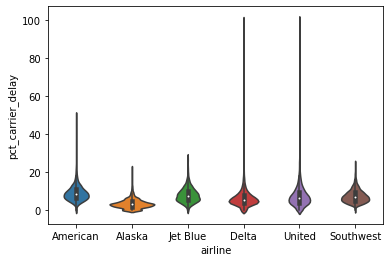

In [216]:
## Code violin plot
sns.violinplot( y=airline_stats["pct_carrier_delay"], x=airline_stats["airline"])
plt.show()

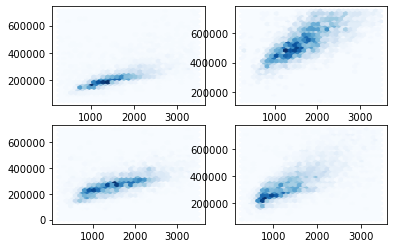

In [228]:
## Code Multiple hexagonal bins
kc_tax1 = kc_tax0[kc_tax0.ZipCode.isin([98188, 98105, 98108, 98126])]
_,ax = plt.subplots(2,2)
ax[0,0].hexbin(kc_tax1[kc_tax1.ZipCode.isin([98188])].SqFtTotLiving, kc_tax1[kc_tax1.ZipCode.isin([98188])].TaxAssessedValue, gridsize=30, cmap=plt.cm.Blues)
ax[0,1].hexbin(kc_tax1[kc_tax1.ZipCode.isin([98105])].SqFtTotLiving, kc_tax1[kc_tax1.ZipCode.isin([98105])].TaxAssessedValue, gridsize=30, cmap=plt.cm.Blues)
ax[1,0].hexbin(kc_tax1[kc_tax1.ZipCode.isin([98108])].SqFtTotLiving, kc_tax1[kc_tax1.ZipCode.isin([98108])].TaxAssessedValue, gridsize=30, cmap=plt.cm.Blues)
ax[1,1].hexbin(kc_tax1[kc_tax1.ZipCode.isin([98126])].SqFtTotLiving, kc_tax1[kc_tax1.ZipCode.isin([98126])].TaxAssessedValue, gridsize=30, cmap=plt.cm.Blues)

plt.show()